In [1]:
from qick_data import *
from scipy.optimize import curve_fit
import numpy as np
import os
import sys

Reading from filepath c:\Users\Hannah\Desktop\SLAC\squat2\Data\2024-05-13_SQUAT_freq_power_scan
Creating dataset with series 20240513_115743
Data was stored as: IQvalue[gain index][freq index]


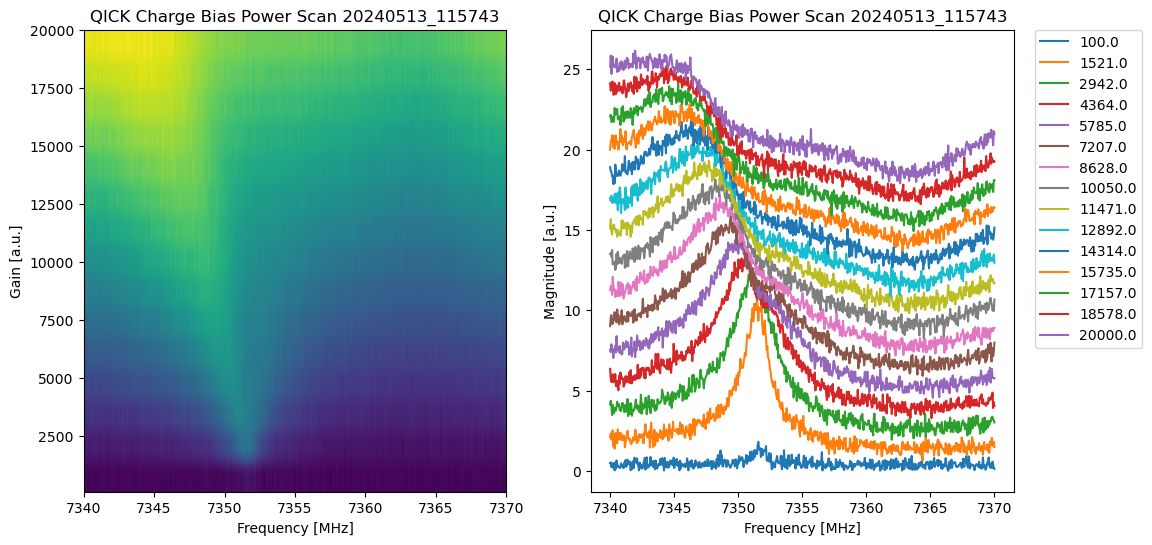

In [43]:
## Pull the data
datapath = 'c:\\Users\\Hannah\\Desktop\\SLAC\\squat2\\Data\\2024-05-13_SQUAT_freq_power_scan'
os.chdir(datapath)
flist = os.listdir()

## Read in and fit degenerate "parity data
fn = "20240513_113303_freq_power_scan_TL.h5"
fn = "20240513_115743_freq_power_scan_CB.h5"
f = read_H5(datapath=datapath, filename=fn, dataclass=QICKdata)

print("Data was stored as:", f.meas_data['datastorage'])

amps = np.abs(f.meas_data['Ivals'] + 1j*f.meas_data['Qvals'])
phases = np.angle(f.meas_data['Ivals'] + 1j*f.meas_data['Qvals'])
freqs = f.meas_data['RF_freqs']

## Plot the data
plt.figure(figsize=(12, 6))
ax0 = plt.subplot(121)
ax0.imshow(amps, aspect='auto', origin='lower', extent=[freqs[0], freqs[-1], f.meas_data['gains'][0], f.meas_data['gains'][-1]])
ax0.set_xlabel('Frequency [MHz]')
ax0.set_ylabel('Gain [a.u.]')
ax0.set_title(f"QICK Charge Bias Power Scan {f.meta['series']}")

ax1 = plt.subplot(122)
for i in range(0, len(f.meas_data['gains'])):
    plt.plot(freqs, amps[i,:], label=f'{f.meas_data["gains"][i]}')
ax1.set_xlabel('Frequency [MHz]')
ax1.set_ylabel('Magnitude [a.u.]')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax1.set_title(f"QICK Charge Bias Power Scan {f.meta['series']}")
plt.show()



In [14]:
f.meas_data.keys()

dict_keys(['Ivals', 'Qvals', 'RF_freqs', 'datastorage', 'gains'])